# Провести анализ базы данных и построить модель регрессии для предсказания цены дома по параметрам

План:

1. Анализ выбросов;
2. Анализ отсутствующих данных;
3. Восстановление значений
4. Преобразовать категориальные признаки
5. Создать модель линейной регрессии
6. Провести поиск отимальных параметров по сетке
7. Обучить и оценить модель

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Загрузим данные и изучим парметры

In [ ]:
df = pd.read_csv(r'Regression\Data\Ames_Housing_Data.csv')
df.head(5)

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


**1. Анализ данных. Поиск выбросов**

Посмотрим как признаки коррелируют друг с другом

In [3]:
df.corr(numeric_only=True)  # корреляция числовых колонок друг с другом

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


МЫ можем отпределить, что нас интересует целевой признак в колонке "SalePrice"

Изучаем корреляцию целевой переменной SalePrice с каждым из признаков и отсортируем данные

In [4]:
df.corr(numeric_only=True)['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

Наиболее сильно коррелирует колонка Overall Qual.
Посмтроим крафик для этих двух переменных

<Axes: xlabel='Overall Qual', ylabel='SalePrice'>

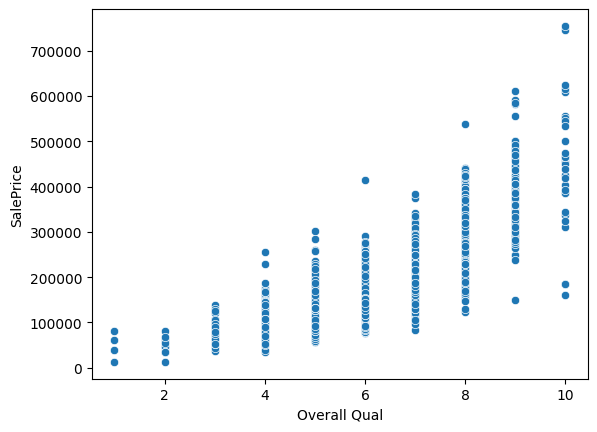

In [5]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

Изучим точки, которые лежат по оси х больше 8, но менее 200 000 по оси у

In [6]:
df[(df['Overall Qual']> 8) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Нарисуем такой же график для признака "Gr Liv Area"

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

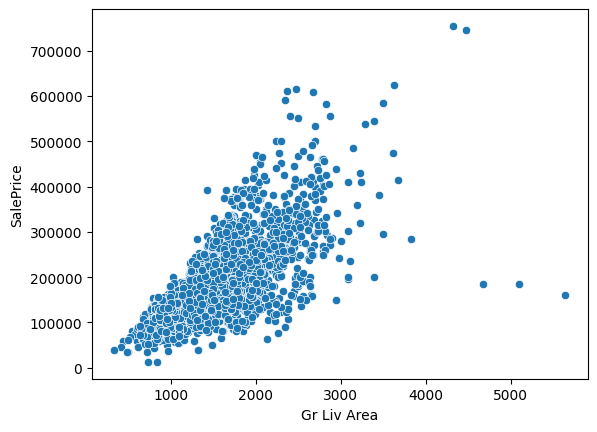

In [7]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

изучим точки, которые лежат по оси х и больше 4000, но менее 200 000 по оси у

In [8]:
df[(df['Gr Liv Area']> 4000) & (df['SalePrice']<200000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Мы видим явные выбросы (в реальном датасете нужна консультация эксперта). Найдем и удалим эти три точки по строкам 1498, 2180 и 2181

In [9]:
drop_index = df[(df['Gr Liv Area']> 4000) & (df['SalePrice']<200000)].index
df = df.drop(drop_index, axis=0)

Посмотри на график после удаления точек

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

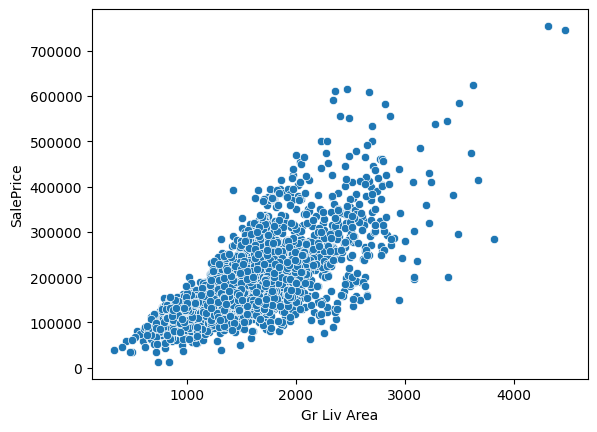

In [10]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

после удаления точек мы видим общий тренд увеличения цены по увеличению площади без выбросов

**2. Анализ данных. Поиск отсутствующих данных (missing data)**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2927 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2927 non-null   int64  
 1   MS SubClass      2927 non-null   int64  
 2   MS Zoning        2927 non-null   object 
 3   Lot Frontage     2437 non-null   float64
 4   Lot Area         2927 non-null   int64  
 5   Street           2927 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2927 non-null   object 
 8   Land Contour     2927 non-null   object 
 9   Utilities        2927 non-null   object 
 10  Lot Config       2927 non-null   object 
 11  Land Slope       2927 non-null   object 
 12  Neighborhood     2927 non-null   object 
 13  Condition 1      2927 non-null   object 
 14  Condition 2      2927 non-null   object 
 15  Bldg Type        2927 non-null   object 
 16  House Style      2927 non-null   object 
 17  Overall Qual     29

Мы можем удалить колонку PID, так как у нас есть другой идентификатор

In [12]:
df = df.drop("PID", axis=1)

Посмторим количество колонок в датафрейме

In [13]:
len(df.columns)

80

Посмотри в каких колонках есть отсутствующий значения (0 это значение)

In [14]:
df.isnull().sum() > 0

MS SubClass       False
MS Zoning         False
Lot Frontage       True
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 80, dtype: bool

вычислим процент пропущенных значений (строк)

In [15]:
100 * df.isnull().sum() / len(df)

MS SubClass        0.00000
MS Zoning          0.00000
Lot Frontage      16.74069
Lot Area           0.00000
Street             0.00000
                    ...   
Mo Sold            0.00000
Yr Sold            0.00000
Sale Type          0.00000
Sale Condition     0.00000
SalePrice          0.00000
Length: 80, dtype: float64

Напишем функцию, которая вычислит пропущенные значения для всех признаков

In [16]:
def percent_missing(my_df):
    result = 100 * my_df.isnull().sum() / len(my_df)

    # Уберем все признаки, где значения == 0
    result = result[result>0].sort_values()
    return result

In [17]:
percent_nan = percent_missing(df)

посмотри на все признаки, где есть отсутствующие значения

In [18]:
percent_nan

Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 2       0.034165
Electrical         0.034165
BsmtFin SF 1       0.034165
Garage Area        0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 1     2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Qual        5.432183
Garage Finish      5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Mas Vnr Type      60.642296
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

Нарисуем график распределения данных

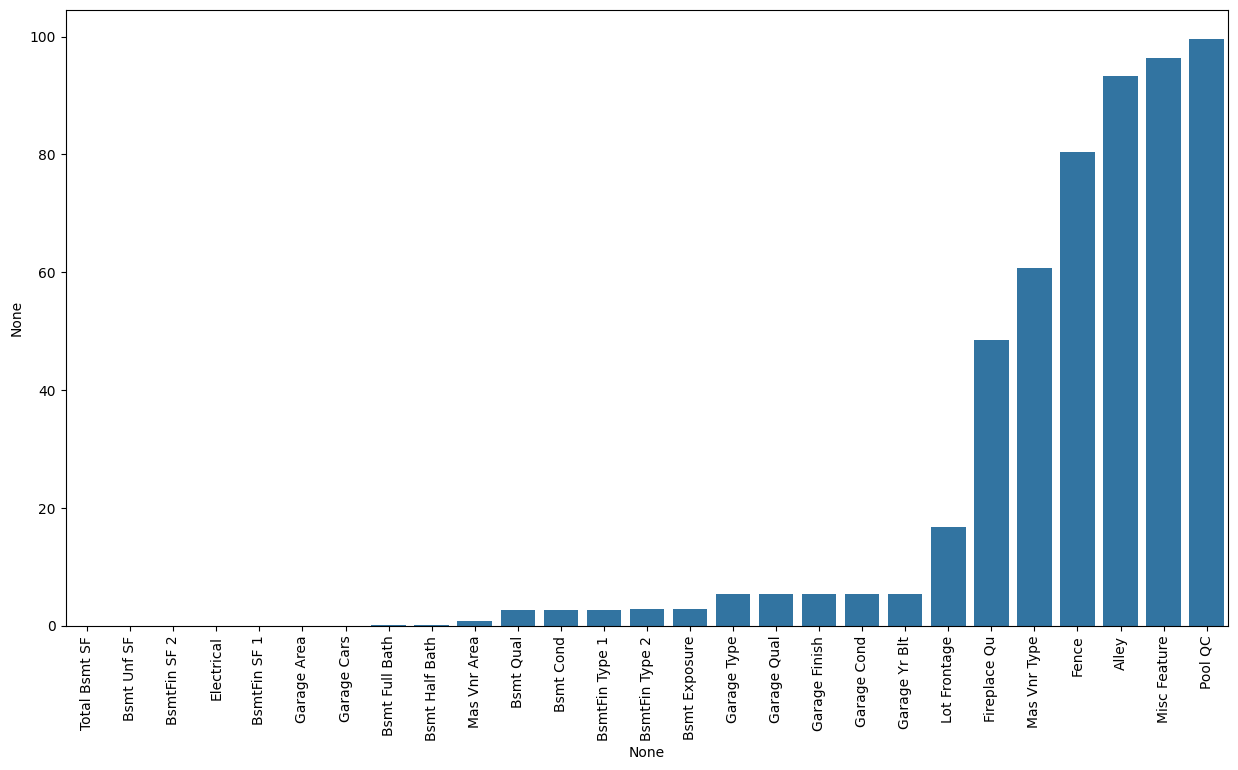

In [19]:
plt.figure(figsize=(15, 8))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

Увеличим график и посмотрим значения от 0 до 1 по оси у


(0.0, 1.0)

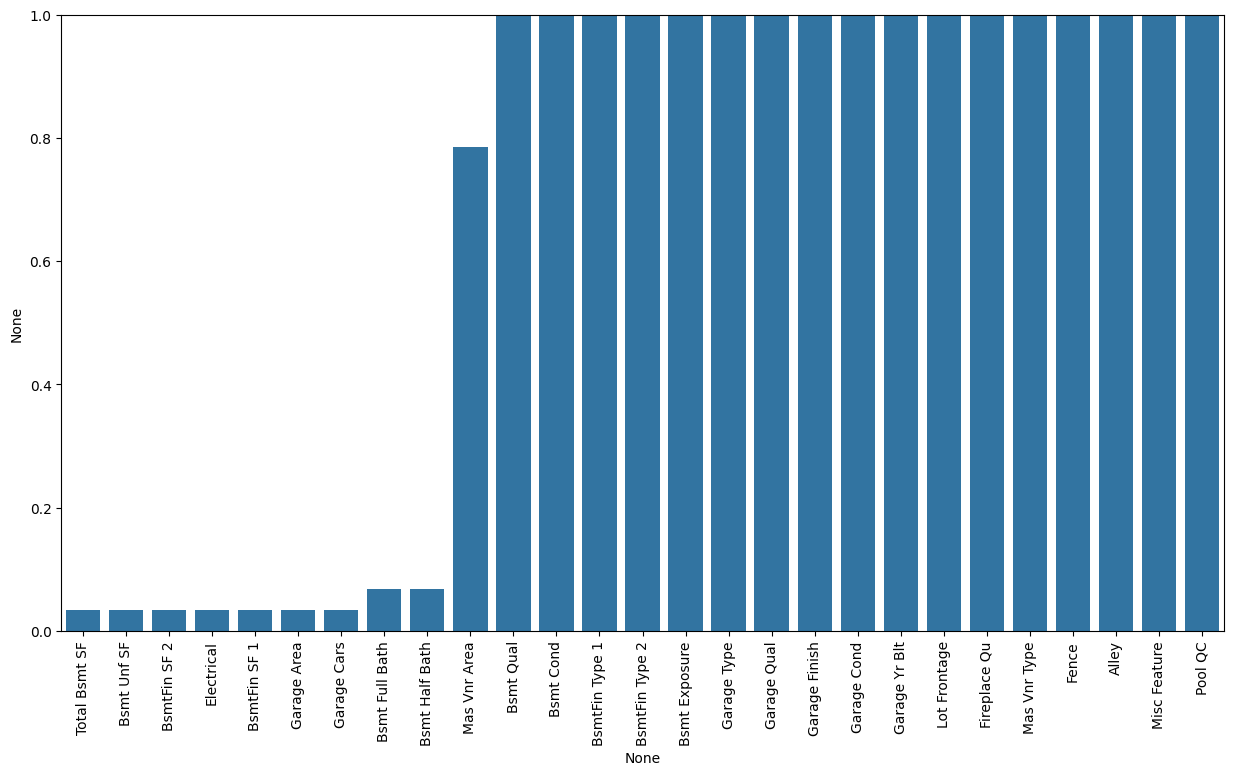

In [20]:
plt.figure(figsize=(15, 8))
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)  # пороговое значение в 1%

Посмотрим на эти строки

In [21]:
percent_nan[percent_nan < 1]

Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 2      0.034165
Electrical        0.034165
BsmtFin SF 1      0.034165
Garage Area       0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
dtype: float64

Что такое 0.034165% (например у "Total Bsmt SF")?

100 / len(df) = 0.0341646737273659

Это значит, что число 0,03 - это одна пустая строка в нашем DF;
а 0.068329 - это две строки

Найдем пустую строку в колонке "Electrical"

In [22]:
df[df['Electrical'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1577,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Найдем две пустые строки в колонке "Bsmt Full Bath"

In [23]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


Удалим строки, где признаки менее 1%. 
Если в этих колонках мы встретим отсутствующие значения, то эти строки мы удалим.

In [24]:
# для всего датафрейма мы смотри только на эти колонки
df = df.dropna(axis=0, subset=['Electrical', 'Garage Area'])

Снова применим функцию поиска пустых значений и посмотрим на них

In [25]:
percent_nan = percent_missing(df)
percent_nan[percent_nan < 1]

Total Bsmt SF     0.034188
Bsmt Unf SF       0.034188
BsmtFin SF 2      0.034188
BsmtFin SF 1      0.034188
Bsmt Full Bath    0.068376
Bsmt Half Bath    0.068376
Mas Vnr Area      0.786325
dtype: float64

(0.0, 1.0)

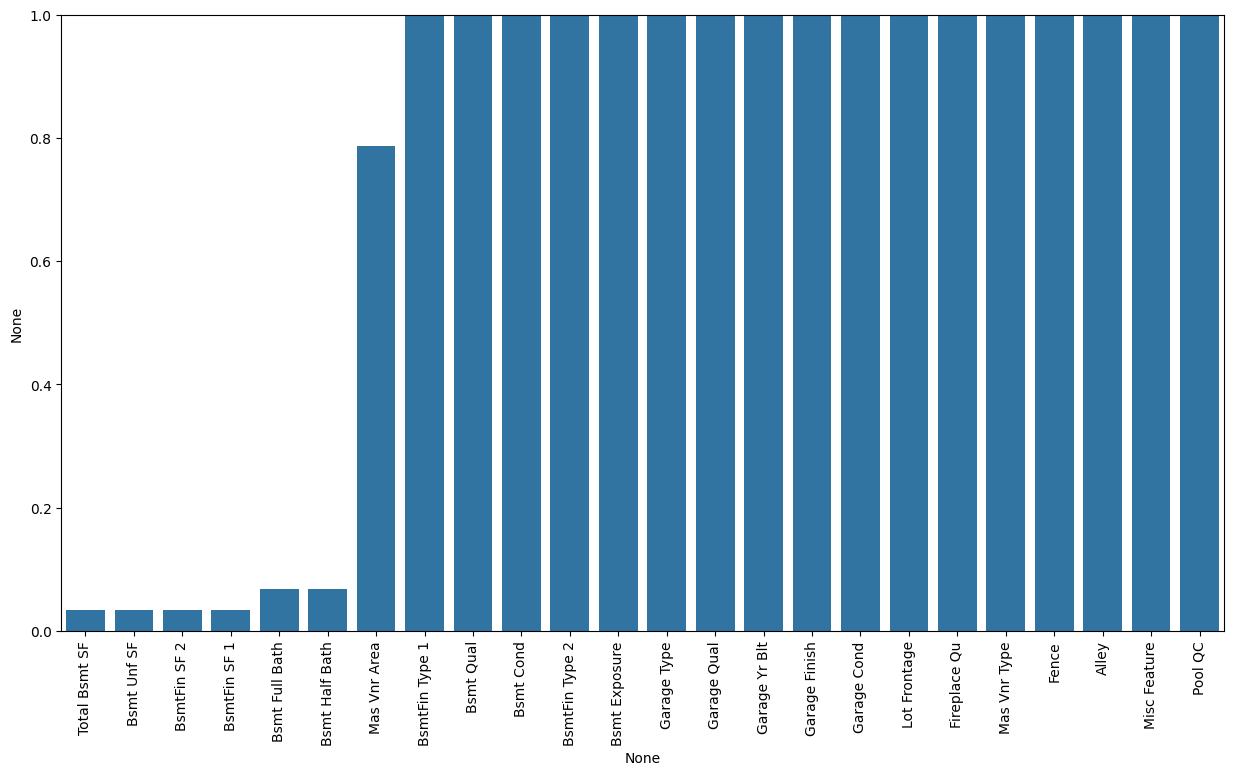

In [26]:
# Посмотрим значения от 0 до 1
plt.figure(figsize=(15, 8), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 1)  # пороговое значение в 1%

Изучим колонки "Bsmt Half Bath", 'Bsmt Full Bath' и 'Bsmt Unf SF'. Возможно они содержат пропуски в одних и тех же строках.

In [27]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [28]:
df[df['Bsmt Full Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1497,20,RL,123.0,47007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [29]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


Для числовых колонок вмнсто отсутствующих значений проставим нули

In [30]:
bsmt_num_col = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_col] = df[bsmt_num_col].fillna(0)

Для текстовых отсутствующих значений мы заменим пропуски на None

In [31]:
bsmt_str_col = ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_col] = df[bsmt_str_col].fillna('None')

Проверим

In [32]:
df[df['Bsmt Half Bath'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


Таким образом мы удалили часть пустых значений и часть других отсутствующих значений заменили на 0 и None.

Пересчитаем проценты пропущенных данных:

In [33]:
percent_nan = percent_missing(df)

Изобразим на графике наш датасет без пропущенных значений

(0.0, 2.0)

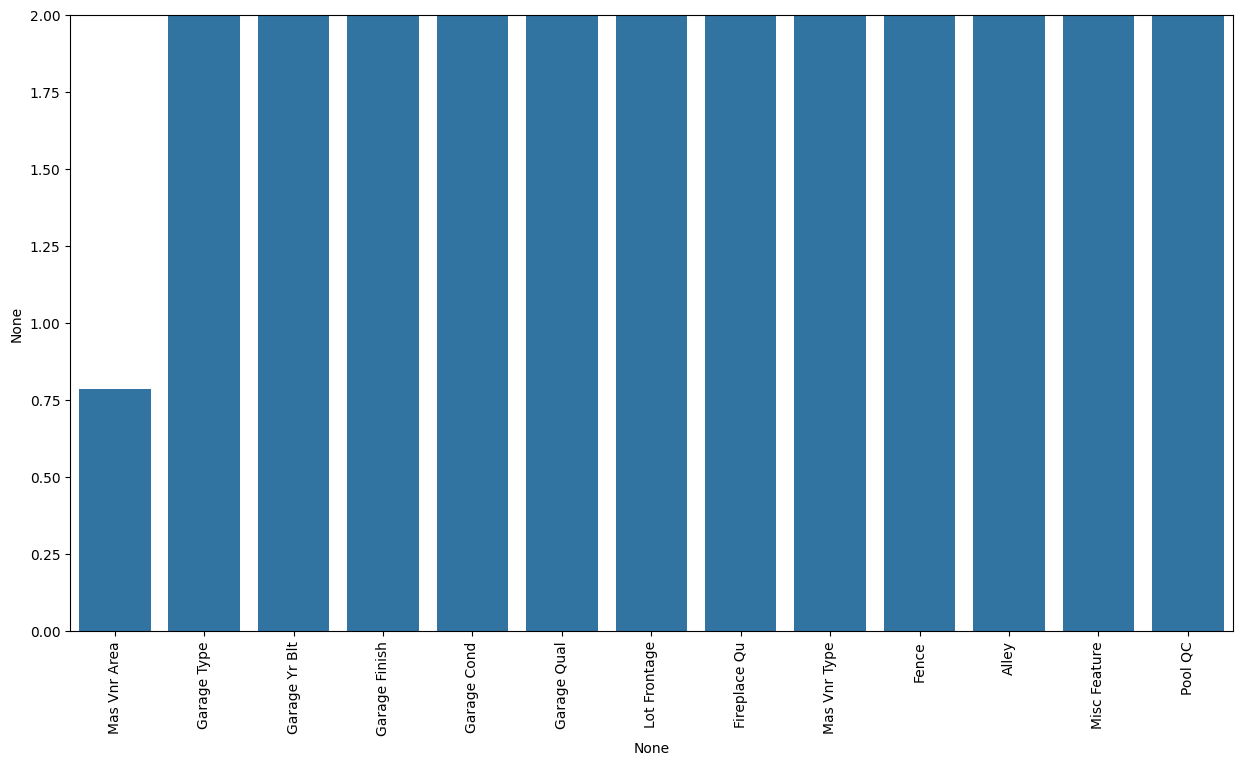

In [34]:
plt.figure(figsize=(15, 8), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.ylim(0, 2)

Проведем теже действия с колонками 'Mas Vnr Type' и 'Mas Vnr Area'

In [35]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

In [36]:
percent_nan = percent_missing(df)

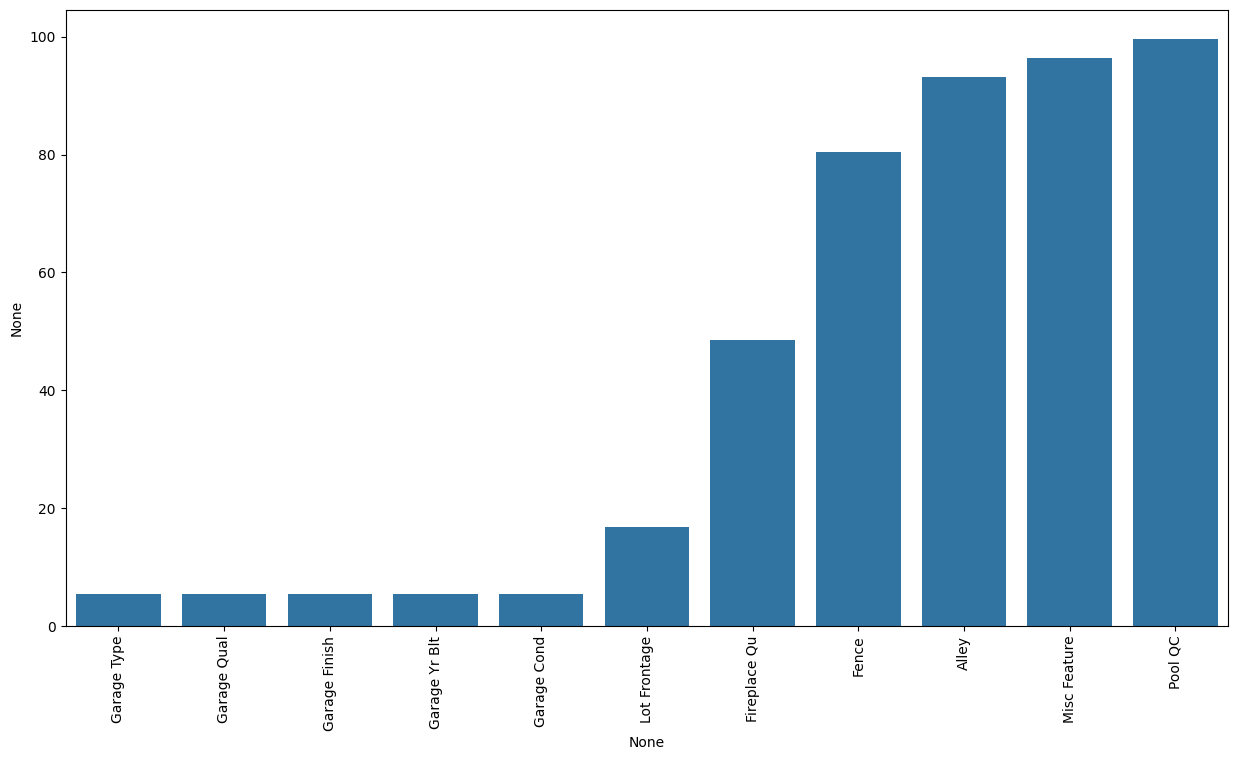

In [37]:
plt.figure(figsize=(15, 8), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

Со строками мы разобрались. Теперь поработаем со столбцами.

Если проценты близки или равны к 100, то вероятно они не влияют на целевую переменную. Мы можем их удалить. 

Признаки, слева, которые близки к 1 по значению, все относятся к гаражу. Скорее всего эти признаки отсутствую для одних и тех же домов. Судя по графику % всех этих признков примерно одинаков. 

In [38]:
gar_str_col = ['Garage Qual', 'Garage Type', 'Garage Finish', 'Garage Cond']
df[gar_str_col] = df[gar_str_col].fillna('None')

In [39]:
gar_num_col = ['Garage Yr Blt']
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

In [40]:
percent_nan = percent_missing(df)

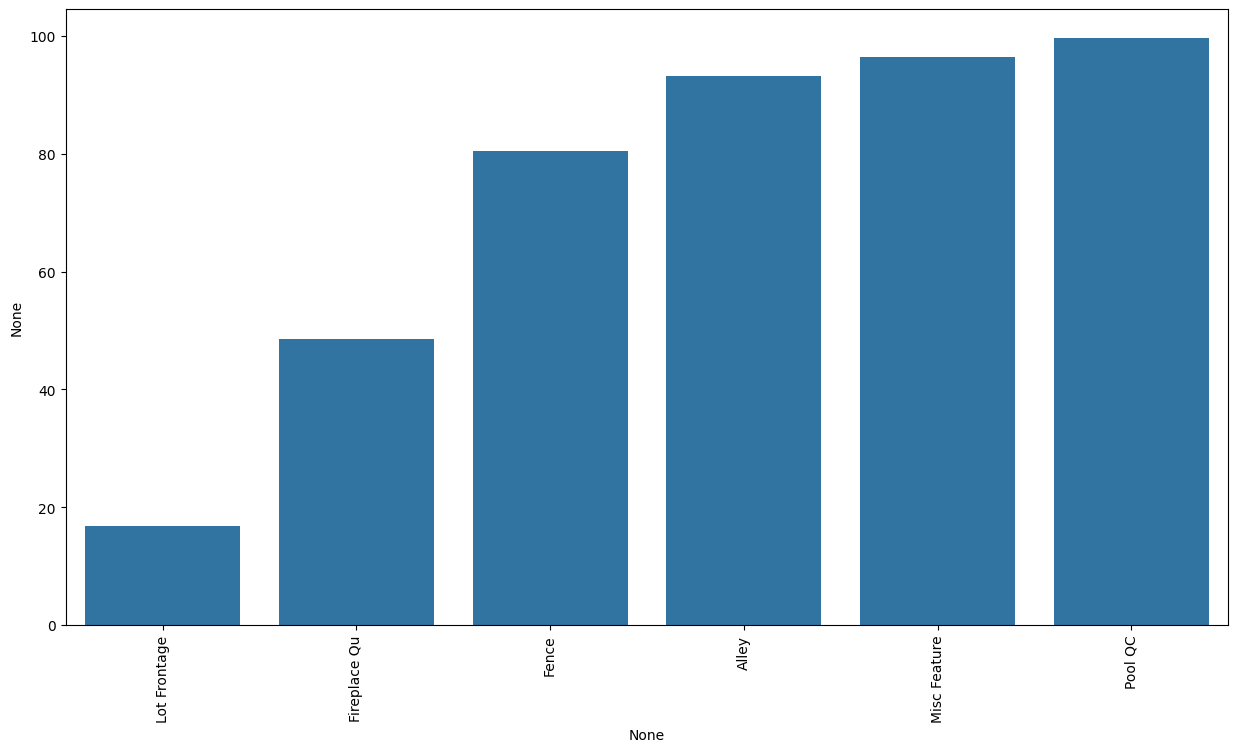

In [41]:
plt.figure(figsize=(15, 8), dpi=100)
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90);

Возьмем колонки с болшим процентом (около 100). Удалим эти колонки.

In [42]:
df = df.drop(['Pool QC', 'Misc Feature', 'Alley', 'Fence'], axis=1)

Изучим эти колонки и для неопределенных значений напишем None и 0

In [43]:
df['Fireplace Qu'].value_counts()

Fireplace Qu
Gd    741
TA    600
Fa     75
Po     46
Ex     43
Name: count, dtype: int64

In [44]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

In [45]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2925, dtype: float64

Попробуем восстановить значения Lot Frontage при помощи других колонок, связанных с удаленностью дома. Вычислим средние значения

<Axes: xlabel='Lot Frontage', ylabel='Neighborhood'>

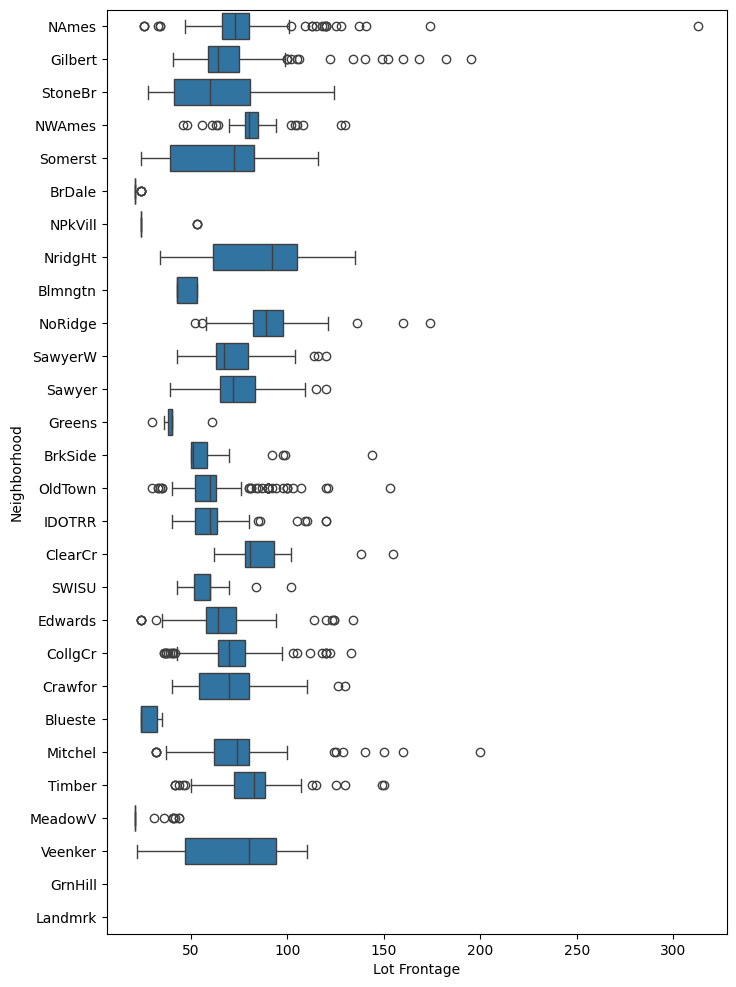

In [46]:
# Lot Frontage
# Neighborhood
plt.figure(figsize=(8, 12), dpi=100)
sns.boxplot(x='Lot Frontage', y='Neighborhood', data=df, orient='h')

In [47]:
df.groupby('Neighborhood')['Lot Frontage'].mean()

Neighborhood
Blmngtn    46.900000
Blueste    27.300000
BrDale     21.500000
BrkSide    55.789474
ClearCr    88.150000
CollgCr    71.336364
Crawfor    69.951807
Edwards    64.794286
Gilbert    74.207207
Greens     41.000000
GrnHill          NaN
IDOTRR     62.383721
Landmrk          NaN
MeadowV    25.606061
Mitchel    75.144444
NAmes      75.210667
NPkVill    28.142857
NWAmes     81.517647
NoRidge    91.629630
NridgHt    84.184049
OldTown    61.777293
SWISU      59.068182
Sawyer     74.551020
SawyerW    70.669811
Somerst    64.549383
StoneBr    62.173913
Timber     81.303571
Veenker    72.000000
Name: Lot Frontage, dtype: float64

Создадим функцию замены по средним значениям. Вызовем метод групбай, затем вызовем метод трансформ и зададим функцию по замене пропущенных данных колонки Lot Frontage на средние значения колонки Neighborhood

In [48]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

In [49]:
df['Lot Frontage'].isnull().sum()

np.int64(3)

Осталось 3 пустые строки. Заменим значения на нули

In [50]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [51]:
df['Lot Frontage'].isnull().sum()

np.int64(0)

In [52]:
percent_nan = percent_missing(df)
percent_nan

Series([], dtype: float64)

Пропущенных значений не осталось

**4. Анализ и преобразование категориальных признаков**

In [53]:
df.isnull().sum() > 0 

MS SubClass       False
MS Zoning         False
Lot Frontage      False
Lot Area          False
Street            False
                  ...  
Mo Sold           False
Yr Sold           False
Sale Type         False
Sale Condition    False
SalePrice         False
Length: 76, dtype: bool

Преобразуем категориальные признаки в dummy - переменные.

Фиктивная переменная (англ. dummy variable) — качественная переменная, принимающая значения 0 и 1, включаемая в эконометрическую модель для учёта влияния качественных признаков и событий на объясняемую переменную

In [54]:
# Преобразуем числа в текстовые значения
df['MS SubClass'] = df['MS SubClass'].apply(str)

Создадим dummy переменные для всех текстовых колонок сразу. Поэтому мы перевели 'MS SubClass' в текст.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2925 entries, 0 to 2929
Data columns (total 76 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS SubClass      2925 non-null   object 
 1   MS Zoning        2925 non-null   object 
 2   Lot Frontage     2925 non-null   float64
 3   Lot Area         2925 non-null   int64  
 4   Street           2925 non-null   object 
 5   Lot Shape        2925 non-null   object 
 6   Land Contour     2925 non-null   object 
 7   Utilities        2925 non-null   object 
 8   Lot Config       2925 non-null   object 
 9   Land Slope       2925 non-null   object 
 10  Neighborhood     2925 non-null   object 
 11  Condition 1      2925 non-null   object 
 12  Condition 2      2925 non-null   object 
 13  Bldg Type        2925 non-null   object 
 14  House Style      2925 non-null   object 
 15  Overall Qual     2925 non-null   int64  
 16  Overall Cond     2925 non-null   int64  
 17  Year Built       29

получим названия только текстовых колонок

In [56]:
df.select_dtypes(include='object')

,MS SubClass,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Kitchen Qual,Functional,Fireplace Qu,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Sale Type,Sale Condition
0,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,TA,Typ,Gd,Attchd,Fin,TA,TA,P,WD,Normal
1,20,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2,20,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Gd,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
3,20,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Ex,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
4,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,TA,Typ,TA,Attchd,Fin,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,...,TA,Typ,None,Detchd,Unf,TA,TA,Y,WD,Normal
2926,20,RL,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,None,Attchd,Unf,TA,TA,Y,WD,Normal
2927,85,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,Typ,None,None,None,None,None,Y,WD,Normal
2928,20,RL,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


Разделим датасет на 2 части: числовые колонки и текстовые

In [57]:
# сохраним все текстовые колонки в переменную
my_object_df = df.select_dtypes(include='object')

In [58]:
# сохраним все числовые колонки в переменную
my_numeric_df = df.select_dtypes(exclude='object')

In [59]:
# преобразование значений в 0 и 1
df_odjects_dummies = pd.get_dummies(my_object_df, drop_first=True)

In [60]:
df_odjects_dummies

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2926,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
2928,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


Проведем конкатинацию (склеивание/смешение) данных из разделенных датафреймов

In [61]:
final_df = pd.concat([my_numeric_df, df_odjects_dummies], axis=1)

In [62]:
final_df

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.000000,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,False,False,False,False,True,False,False,False,True,False
1,80.000000,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,False,False,False,False,True,False,False,False,True,False
2,81.000000,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,False,False,False,False,True,False,False,False,True,False
3,93.000000,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,False,False,False,False,True,False,False,False,True,False
4,74.000000,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,37.000000,7937,6,6,1984,1984,0.0,819.0,0.0,184.0,...,False,False,False,False,True,False,False,False,True,False
2926,75.144444,8885,5,5,1983,1983,0.0,301.0,324.0,239.0,...,False,False,False,False,True,False,False,False,True,False
2927,62.000000,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,...,False,False,False,False,True,False,False,False,True,False
2928,77.000000,10010,5,5,1974,1975,0.0,1071.0,123.0,195.0,...,False,False,False,False,True,False,False,False,True,False


Посмотрим корреляцию по целевой переменной

In [63]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 274, dtype: float64

Наши признаки очищенны и подготовлены

**5. Создадим модель линейной регрессии** 

Разделим целевую переменную и признаки

In [64]:
X = final_df.drop("SalePrice", axis=1)
y = final_df['SalePrice']

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Рзделим признаки на тренировочные и тестовые

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

Проведем масштабирование обучающих и тестовых данных

In [67]:
scaler = StandardScaler()

In [68]:
scaled_x_train = scaler.fit_transform(X_train)

In [69]:
scaled_x_test = scaler.transform(X_test)

**6. Проведем поиск подборку гиперпараметров по сетке**

In [70]:
from sklearn.linear_model import ElasticNet

Создаем экземпляр модели

In [71]:
base_elastic_model = ElasticNet(max_iter=500000)

Создадим словарь со значениями для гиперпараметров

In [72]:
param_grid = {'alpha':[5, 10, 100, 110], 'l1_ratio':[0.7, 0.99, 1]}

Создадим объект поиска гиперпараметров

In [73]:
from sklearn.model_selection import GridSearchCV

создадим модел поиска гиперпараметров

In [74]:
grid_model = GridSearchCV(base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

Обучим модель

In [ ]:
grid_model.fit(X_train, y_train)

Выведем наилучшие значения гиперпараметров

In [76]:
grid_model.best_params_

{'alpha': 10, 'l1_ratio': 1}

l1_ratio = 1 - это чистая Lasso регрессия

Оценим работу модели на тестовых данных

In [ ]:
y_pred = grid_model.predict(scaled_x_test)

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [79]:
mean_absolute_error(y_test, y_pred)

np.float64(168976.4908310266)

In [80]:
np.sqrt(mean_squared_error(y_test, y_pred))

np.float64(197317.02549904984)

Сравгим метрики со средним значением целевой переменной

In [81]:
np.mean(df['SalePrice'])

np.float64(180815.53743589742)

Наша модель имеется погрешность в пределах 10% от средней цены продажи дома

переменные для сохранения моделей

In [82]:
final_scaler_house = StandardScaler()
final_house_elastic_model = ElasticNet()
final_param_grid_house = {'alpha':[10], 'l1_ratio':[1]}
final_grid_model_house = GridSearchCV(final_house_elastic_model,
                          param_grid=final_param_grid_house,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [83]:
from joblib import dump, load

In [ ]:
# сохраним модель
dump(final_scaler_house, r'Regression\safe models\final_scaler_house.joblib')
dump(final_house_elastic_model, r'Regression\safe models\final_house_elastic_model.joblib')
dump(final_param_grid_house, r'Regression\safe models\final_param_grid_house.joblib')
dump(final_grid_model_house, r'Regression\safe models\final_grid_model_house.joblib')